# 49ers WP Charts 2019

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.interpolate import make_interp_spline, BSpline

sns.set(style="whitegrid", 
        palette="pastel", 
        font='Circular Spotify Text', 
        font_scale = 1.1, 
        rc= {'grid.color': '.95', 'xtick.color': '.3', 'ytick.color': '.3'})


## Data

In [19]:
df = pd.read_csv("../data/pbp_2019.csv")

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (167,168,191,192,199,200,227,228) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [20]:
df.head()

,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,...,penalty_player_id,penalty_player_name,penalty_yards,replay_or_challenge,replay_or_challenge_result,penalty_type,defensive_two_point_attempt,defensive_two_point_conv,defensive_extra_point_attempt,defensive_extra_point_conv
0,35,2019090500,CHI,GB,GB,away,CHI,CHI,35.0,2019-09-05,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
1,50,2019090500,CHI,GB,GB,away,CHI,GB,75.0,2019-09-05,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
2,71,2019090500,CHI,GB,GB,away,CHI,GB,75.0,2019-09-05,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
3,95,2019090500,CHI,GB,GB,away,CHI,GB,75.0,2019-09-05,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
4,125,2019090500,CHI,GB,GB,away,CHI,GB,85.0,2019-09-05,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0


In [21]:
list(df.columns)

['play_id',
 'game_id',
 'home_team',
 'away_team',
 'posteam',
 'posteam_type',
 'defteam',
 'side_of_field',
 'yardline_100',
 'game_date',
 'quarter_seconds_remaining',
 'half_seconds_remaining',
 'game_seconds_remaining',
 'game_half',
 'quarter_end',
 'drive',
 'sp',
 'qtr',
 'down',
 'goal_to_go',
 'time',
 'yrdln',
 'ydstogo',
 'ydsnet',
 'desc',
 'play_type',
 'yards_gained',
 'shotgun',
 'no_huddle',
 'qb_dropback',
 'qb_kneel',
 'qb_spike',
 'qb_scramble',
 'pass_length',
 'pass_location',
 'air_yards',
 'yards_after_catch',
 'run_location',
 'run_gap',
 'field_goal_result',
 'kick_distance',
 'extra_point_result',
 'two_point_conv_result',
 'home_timeouts_remaining',
 'away_timeouts_remaining',
 'timeout',
 'timeout_team',
 'td_team',
 'posteam_timeouts_remaining',
 'defteam_timeouts_remaining',
 'total_home_score',
 'total_away_score',
 'posteam_score',
 'defteam_score',
 'score_differential',
 'posteam_score_post',
 'defteam_score_post',
 'score_differential_post',
 'no_sc

In [22]:
team_colors = {
    'SF': '#AA0000',
    'KC': '#000000',
    'ARI': '#000000',
    'ATL': '#000000',
    'BAL': '#241773',
    'PHI': '#004953',
    'NYG': '#0B2265',
    'NO': '#9F8958',
    'NE': '#002244',
    'MIN': '#4F2683',
    'MIA': '#008E97',
    'IND': '#002C5F',
    'CLE': '#FB4F14',
    'LAC': '#002244',
    'DEN': '#FB4F14',
    'CAR': '#0085CA',
    'GB': '#203731',
    'DET': '#005A8B',
    'OAK': '#A5ACAF',
    'CIN': '#FB4F14',
    'WAS': '#773141',
    'TEN': '#002244',
    'TB': '#000000',
    'PIT': '#FFB612',
    'NYJ': '#203731',
    'BUF': '#00338D',
    'LA': '#002244',
    'JAX': '#006778',
    'DAL': '#002244',
    'CHI': '#0B162A',
    'HOU': '#03202F',
    'SEA': '#002244'
}

team_colors_main = {
    'SF': '#AA0000',
    'KC': '#E31837',
    'ARI': '#97233F',
    'ATL': '#A71930',
    'BAL': '#241773',
    'PHI': '#004953',
    'NYG': '#0B2265',
    'NO': '#9F8958',
    'NE': '#002244',
    'MIN': '#4F2683',
    'MIA': '#008E97',
    'IND': '#002C5F',
    'CLE': '#FB4F14',
    'LAC': '#002244',
    'DEN': '#002244',
    'CAR': '#0085CA',
    'GB': '#203731',
    'DET': '#005A8B',
    'OAK': '#A5ACAF',
    'CIN': '#FB4F14',
    'WAS': '#773141',
    'TEN': '#002244',
    'TB': '#D50A0A',
    'PIT': '#FFB612',
    'NYJ': '#203731',
    'BUF': '#00338D',
    'LA': '#002244',
    'JAX': '#006778',
    'DAL': '#002244',
    'CHI': '#0B162A',
    'HOU': '#03202F',
    'SEA': '#002244'
}

team_colors_gray = {
    
    'SF': '#AA0000',
    'KC': '#D9D9D9',
    'ARI': '#D9D9D9',
    'ATL': '#D9D9D9',
    'BAL': '#D9D9D9',
    'PHI': '#D9D9D9',
    'NYG': '#D9D9D9',
    'NO': '#D9D9D9',
    'NE': '#D9D9D9',
    'MIN': '#D9D9D9',
    'MIA': '#D9D9D9',
    'IND': '#D9D9D9',
    'CLE': '#D9D9D9',
    'LAC': '#D9D9D9',
    'DEN': '#D9D9D9',
    'CAR': '#D9D9D9',
    'GB': '#D9D9D9',
    'DET': '#D9D9D9',
    'OAK': '#D9D9D9',
    'CIN': '#D9D9D9',
    'WAS': '#D9D9D9',
    'TEN': '#D9D9D9',
    'TB': '#D9D9D9',
    'PIT': '#D9D9D9',
    'NYJ': '#D9D9D9',
    'BUF': '#D9D9D9',
    'LA': '#D9D9D9',
    'JAX': '#D9D9D9',
    'DAL': '#D9D9D9',
    'CHI': '#D9D9D9',
    'HOU': '#D9D9D9',
    'SEA': '#D9D9D9'
}

In [23]:
# Getting all the game ID's for San Francisco's games
sf_schedule = (
    df[(df['home_team'] == 'SF') | (df['away_team'] == 'SF')]
        .groupby(['game_date', 'game_id', 'away_team', 'home_team'])
        [['total_away_score','total_home_score']]
        .max()
        .reset_index()
        .sort_values('game_date')
)

sf_schedule

,game_date,game_id,away_team,home_team,total_away_score,total_home_score
0,2019-09-08,2019090811,SF,TB,31,17


### Mirror charts 50/50

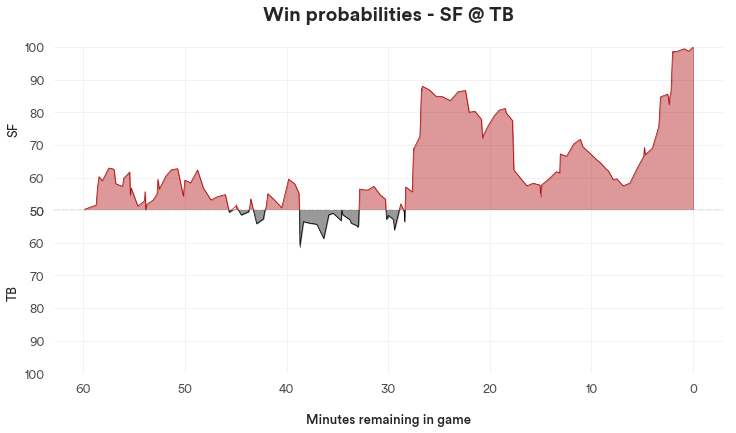

In [37]:
# Looping through SFs game IDs, pulling home team and away team to use as column names and pull correct team colors

game_ids = list(sf_schedule['game_id'])


for g, game in enumerate(game_ids):
    
    home_team, away_team = sf_schedule[sf_schedule['game_id'] == game][['home_team', 'away_team']].values[0]
    
    win_probs = (df[df['game_id'] == game][['away_wp', 'home_wp', 'game_seconds_remaining']]
                 .rename(columns={'home_wp': home_team, 'away_wp': away_team, 'game_seconds_remaining': 'game_minutes_remaining'})
                 )
    
    win_probs[home_team] =  win_probs[home_team].interpolate() * 100
    win_probs[away_team] =  win_probs[away_team].interpolate() * 100
    win_probs = win_probs.dropna()
    
    win_probs['game_minutes_remaining'] = win_probs['game_minutes_remaining']/60
    
    #win_probs[home_team] =  win_probs[home_team].astype(int)
    #win_probs[away_team] =  win_probs[away_team].astype(int)
    
    sf_max = win_probs['SF'].max()
    max_time = win_probs[win_probs['SF'] == sf_max]['game_minutes_remaining'].min()
    
    f, ax = plt.subplots(figsize=(12, 6))
    plt.subplots_adjust(hspace = 0)
    
    #ax.set_title('{} @ {}\n'.format(away_team, home_team), fontsize=20, weight='bold')
    #ax.set_ylabel('Win probability\n')
    #ax.set_xlabel('\nMinutes remaining in game')
    
    #Draw home team
    
    plt.subplot(2, 1, 1)
    
    plt.title('Win probabilities - {} @ {}\n'.format(away_team, home_team), fontsize=20, weight='bold')

    
    
    ax = sns.lineplot(x=win_probs['game_minutes_remaining'], y=win_probs[away_team], color=team_colors[away_team], lw=0.7)
    
    plt.axhline(y=50, color='grey', linestyle='--', alpha=0.3)
    
    plt.fill_between(win_probs['game_minutes_remaining'].values, 
                     win_probs[away_team].values, 
                     color=team_colors[away_team], 
                     alpha = 0.4,
                     edgecolor=None
                    )
    

    
    if away_team == 'SF' and sf_max < 100:
        
        ax.text(max_time,
            sf_max + 5,
            str(round(sf_max, 1)) + '%',
            horizontalalignment='left',
            size='medium',
            color=team_colors['SF'],
            weight='light')
    
    ax.set_ylim((50,100))
    
    ax.invert_xaxis()
    
    plt.subplot(2, 1, 2)
    
    ax = sns.lineplot(x=win_probs['game_minutes_remaining'], y=win_probs[home_team], color=team_colors[home_team], lw=0.7)
    
    plt.fill_between(win_probs['game_minutes_remaining'].values, 
                     win_probs[home_team].values, 
                     color=team_colors[home_team], 
                     alpha = 0.4,
                     edgecolor=None
                    )

    
    if home_team == 'SF' and sf_max < 100:
        
        ax.text(max_time,
            sf_max + 10,
            str(round(sf_max, 1)) + '%',
            horizontalalignment='left',
            size='medium',
            color=team_colors['SF'],
            weight='light')

    
    ax.set_ylim((50,100))
    
    ax.invert_xaxis()
    ax.invert_yaxis()
    
    plt.xlabel("\nMinutes remaining in game", weight='medium')
    
    
    sns.despine(left=True, right=True, bottom=True, top=True)
    
    filename = str(away_team + '_at_' + home_team)
    
    plt.savefig('output/' + filename + '.png', format='png', dpi=300)
    
    